# Read all GeoJson files

The geojson files were converted from GML files using a script within QGis (screenshot in FiC shared files)

In [2]:
import geopandas as gpd
import os

all_file = []
for file in os.listdir("Output/"):
        if file.endswith(".geojson"):
            file = "Output/"+ file 
            db = gpd.read_file(file)
            all_file.append(db)

# Merge all the grids into a single GeoPandas 

In [94]:
import pandas as pd
rdf = gpd.GeoDataFrame(pd.concat(all_file, ignore_index=True))

<AxesSubplot: >

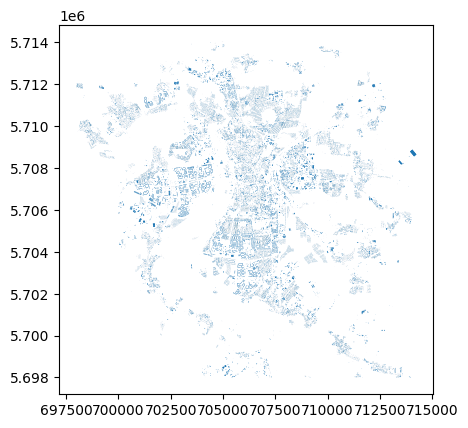

In [32]:
rdf.plot()

# Geometry type

In [96]:
rdf.geometry.geom_type.unique()

array(['MultiPolygon', 'GeometryCollection'], dtype=object)

In [97]:
len(rdf[rdf.geometry.geom_type=='GeometryCollection'])

58

In [98]:
len(rdf[rdf.geometry.geom_type=='MultiPolygon'])

88912

Keep only multipolygones

In [99]:
rdf = rdf[rdf.geometry.geom_type=='MultiPolygon']

# Set crs to the common used one (3035)

In [100]:
rdf.crs = {'init' :'epsg:3035'}

C:\Users\bbel\AppData\Local\Programs\Python\Python39\lib\site-packages\pyproj\crs\crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


In [109]:
rdf = rdf.to_crs('3035')

In [113]:
rdf.crs

<Derived Projected CRS: EPSG:3035>
Name: ETRS89-extended / LAEA Europe
Axis Info [cartesian]:
- Y[north]: Northing (metre)
- X[east]: Easting (metre)
Area of Use:
- name: Europe - European Union (EU) countries and candidates. Europe - onshore and offshore: Albania; Andorra; Austria; Belgium; Bosnia and Herzegovina; Bulgaria; Croatia; Cyprus; Czechia; Denmark; Estonia; Faroe Islands; Finland; France; Germany; Gibraltar; Greece; Hungary; Iceland; Ireland; Italy; Kosovo; Latvia; Liechtenstein; Lithuania; Luxembourg; Malta; Monaco; Montenegro; Netherlands; North Macedonia; Norway including Svalbard and Jan Mayen; Poland; Portugal including Madeira and Azores; Romania; San Marino; Serbia; Slovakia; Slovenia; Spain including Canary Islands; Sweden; Switzerland; Turkey; United Kingdom (UK) including Channel Islands and Isle of Man; Vatican City State.
- bounds: (-35.58, 24.6, 44.83, 84.73)
Coordinate Operation:
- name: Europe Equal Area 2001
- method: Lambert Azimuthal Equal Area
Datum: Europ

# Save into a GeoJson file

In [116]:
rdf.to_file('Halle_Truth_Final.geojson', driver='GeoJSON')  

In [117]:
rdf.head()

gml_id creationDate  \
0  DEST_DESTLIKA0000Pxal   2017-12-14   
1  DEST_DESTLIKA0000PJDr   2017-12-14   
2  DEST_DESTLIKA0001xWXA   2017-12-14   
3  DEST_DESTLIKA0001xX1V   2017-12-14   
4  DEST_DESTLIKA0000PJH2   2017-12-14   

                                   informationSystem              name  \
0  http://repository.gdi-de.org/schemas/adv/cityg...  DESTLIKA0000Pxal   
1  http://repository.gdi-de.org/schemas/adv/cityg...  DESTLIKA0000PJDr   
2  http://repository.gdi-de.org/schemas/adv/cityg...  DESTLIKA0001xWXA   
3  http://repository.gdi-de.org/schemas/adv/cityg...  DESTLIKA0001xX1V   
4  http://repository.gdi-de.org/schemas/adv/cityg...  DESTLIKA0000PJH2   

   Gemeindeschluessel    function  measuredHeight measuredHeight_uom  \
0            15088319  31001_1000           2.267      urn:adv:uom:m   
1            15088319  31001_1000           2.461      urn:adv:uom:m   
2            15002000  31001_1000           2.270      urn:adv:uom:m   
3            15002000  31001_2000           7.439      urn:adv:uom:m   
4            15088319  31001_1000           3.738      urn:adv:uom:m   

   CountryName          LocalityName ThoroughfareNumber   ThoroughfareName  \
0  Deutschland              Salzatal               None               None   
1  Deutschland              Salzatal               None               None   
2  Deutschland  Halle (Saale), Stadt               None               None   
3  Deutschland  Halle (Saale), Stadt                 13  Max-Planck-Straße   
4  Deutschland              Salzatal               None               None   

  name_                                           geometry  measuredHeight_  \
0  None  MULTIPOLYGON (((698212.847 5709902.735, 698216...              NaN   
1  None  MULTIPOLYGON (((699449.776 5709137.726, 699455...              NaN   
2  None  MULTIPOLYGON (((699082.511 5709607.570, 699084...              NaN   
3  None  MULTIPOLYGON (((699916.921 5709487.062, 699928...              NaN   
4  None  MULTIPOLYGON (((698890.856 5709605.857, 698891...              NaN   

  measuredHeight_uom_  
0                 NaN  
1                 NaN  
2                 NaN  
3                 NaN  
4                 NaN

<AxesSubplot: >

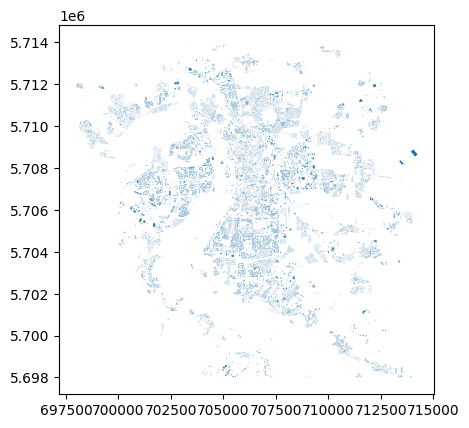

In [104]:
rdf.plot()

# Convert to GeoTiff

In [118]:
from geocube.api.core import make_geocube
resolution = 10
out_grid = make_geocube(vector_data=rdf, measurements=['measuredHeight'] , resolution=(resolution, -resolution))
out_grid['measuredHeight'].rio.to_raster('Hall_Truth.tiff')
